In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/Users/ConCa/Documents/DeepLearning/Assignment/LSTM/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
df = pd.read_csv('climate.csv')

data = df.iloc[:, [2]].values
print(len(data))

420551


In [3]:
def DataNormalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data-data_mean)/data_std

In [4]:
train_split = int(0.715*int(df.shape[0]))
print(train_split)

data = DataNormalize(data, train_split)
# print(len(data))

train_data = data[:train_split]
val_data = data[train_split:]

len(train_data)
len(val_data)

300693


In [5]:
past = 720
future = 72
step = 6
batch_size = 256

start = past + future # start = 792
end = start + train_split # end = 792 + 300693 

X_train = train_data # Dữ liệu từ quá khứ
y_train = data[start:end] # Dữ liệu nhãn bắt đầu từ 792 -> 792+ 300963

sequence_length = int(past/step)
print(sequence_length)

X_end = len(val_data) - past - future

label_start = train_split + past + future

X_val = val_data[:X_end]
y_val = data[label_start:]

120


In [6]:
dataset_train = tf.keras.preprocessing.timeseries_dataset_from_array(X_train, y_train, 
                                                                     sequence_length=sequence_length, 
                                                                     sampling_rate=step, 
                                                                     batch_size=batch_size)
dataset_val = tf.keras.preprocessing.timeseries_dataset_from_array(X_val, y_val, 
                                                                   sequence_length=sequence_length, 
                                                                   sampling_rate=step, 
                                                                   batch_size=batch_size)

2024-10-27 11:08:42.231151: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-10-27 11:08:42.231173: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-10-27 11:08:42.231181: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-10-27 11:08:42.231198: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-10-27 11:08:42.231209: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
dataset_train

<_BatchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.float64, name=None))>

In [8]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(sequence_length, 1)))
model.add(tf.keras.layers.LSTM(32))
model.add(tf.keras.layers.Dense(1))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.compile(optimizer='Adam', loss='mse')

In [10]:
epochs = 10
history = model.fit(dataset_train, epochs=epochs, validation_data=dataset_val)

Epoch 1/10


2024-10-27 11:08:42.664211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 31s 26ms/step - loss: 0.2624 - val_loss: 0.1564
Epoch 2/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 30s 26ms/step - loss: 0.1438 - val_loss: 0.1662
Epoch 3/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 31s 26ms/step - loss: 0.1362 - val_loss: 0.1722
Epoch 4/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 30s 25ms/step - loss: 0.1357 - val_loss: 0.1734
Epoch 5/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 30s 26ms/step - loss: 0.1338 - val_loss: 0.1696
Epoch 6/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 31s 26ms/step - loss: 0.1322 - val_loss: 0.1650
Epoch 7/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 31s 26ms/step - loss: 0.1312 - val_loss: 0.1605
Epoch 8/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 32s 28ms/step - loss: 0.1309 - val_loss: 0.1552
Epoch 9/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 32s 27ms/step - loss: 0.1298 - val_loss: 0.1509
Epoch 10/10
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 30s 26ms/step - loss: 0.1295 - val_loss: 0.1477


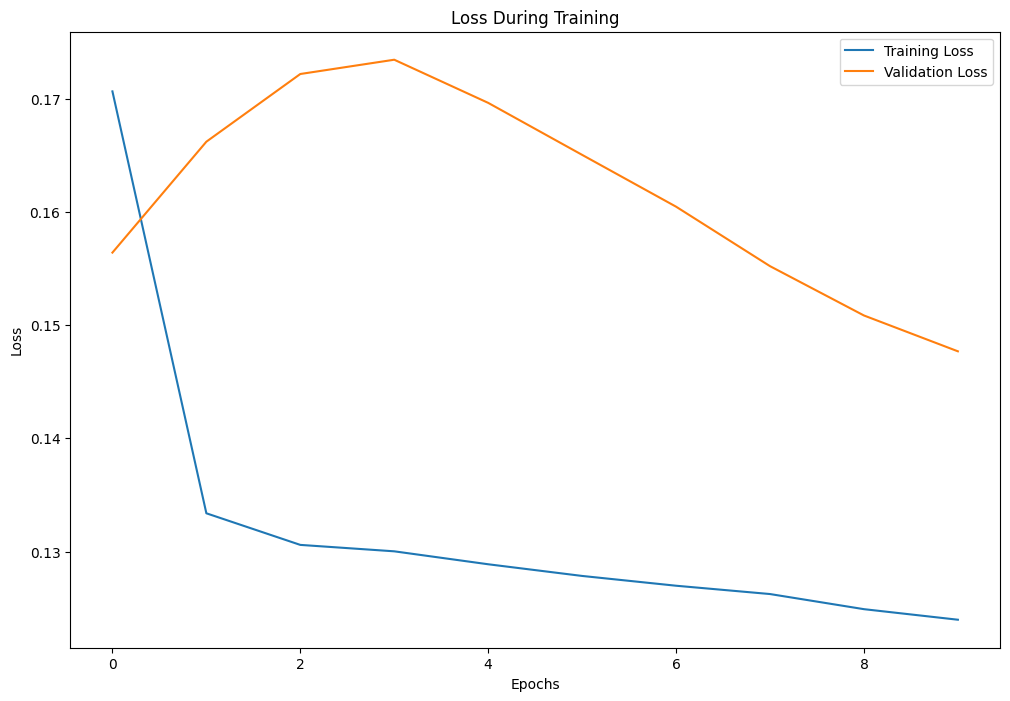

In [11]:
plt.figure(figsize=(12, 8))

# Plot the loss graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
X_test = np.random.rand(120) * 30 
input_data = np.reshape(X_test, (1, 120, 1))
y_pred = model.predict(input_data)
print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
[[2.1179705]]


In [13]:
data_7 = df.iloc[:, [1,2,5,7,8,10,11]].values
print(len(data_7))

420551


In [14]:
data_7 = DataNormalize(data_7, train_split)
# print(len(data))

train_data_7 = data_7[:train_split]
val_data_7 = data_7[train_split:]
# print(train_data_7)

X_train_7 = train_data_7 # Dữ liệu từ quá khứ
y_train_7 = data_7[start:end] # Dữ liệu nhãn bắt đầu từ 792 -> 792+ 300963
# print(X_train_7)

X_val_7 = val_data_7[:X_end]
y_val_7 = data_7[label_start:]
# print(X_val_7)

In [15]:
dataset_train_7 = tf.keras.preprocessing.timeseries_dataset_from_array(X_train_7, y_train_7, 
                                                                     sequence_length=sequence_length, 
                                                                     sampling_rate=step, 
                                                                     batch_size=batch_size)
dataset_val_7 = tf.keras.preprocessing.timeseries_dataset_from_array(X_val_7, y_val_7, 
                                                                   sequence_length=sequence_length, 
                                                                   sampling_rate=step, 
                                                                   batch_size=batch_size)

In [16]:
dataset_train_7

<_BatchDataset element_spec=(TensorSpec(shape=(None, None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None, 7), dtype=tf.float64, name=None))>

In [17]:
model_7 = tf.keras.Sequential()
model_7.add(tf.keras.layers.Input(shape=(sequence_length, 7)))
model_7.add(tf.keras.layers.LSTM(32))
model_7.add(tf.keras.layers.Dense(1))

model_7.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 32)             │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,153 (20.13 KB)

 Trainable params: 5,153 (20.13 KB)

 Non-trainable params: 0 (0.00 B)

: 

In [38]:
model_7.compile(optimizer='Adam', loss='mse')
epochs = 10
history_new = model.fit(dataset_train_7, epochs=epochs, validation_data=dataset_val_7)

Epoch 1/10
